# Data Exploration

### Question 1
- How does the issued loans vary year after year?
- What are the purposes of applying **Lending Club** loans?
- Do you observe different loan grade patterns for different loan purposes?
- Do you observe different loan grade patterns in different years?
- How about loan counts stratified into years and loan purposes/loan grades?


### Question 2
- How are the loan amounts/funded amounts distributed?
- Are there variations across different loan purposes, loan grades, etc?
- Are loans with higher funded amounts harder to be paid-in-full?

In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [4]:
accepted = pd.read_csv('accepted.csv')

In [5]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
accepted['loan_amnt'].describe()

count    2.260668e+06
mean     1.504693e+04
std      9.190245e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.290000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [7]:
subset = accepted[['grade','issue_d','purpose']]

In [8]:
subset['issue_d'] = subset['issue_d'].astype(str)
subset['year'] = subset['issue_d'].apply(lambda x: x.split("-")[-1])

<ipython-input-8-fc06d49aa6b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['issue_d'] = subset['issue_d'].astype(str)
<ipython-input-8-fc06d49aa6b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = subset['issue_d'].apply(lambda x: x.split("-")[-1])


In [9]:
subset = subset.drop(['issue_d'], axis=1).dropna()
subset

,grade,purpose,year
0,C,debt_consolidation,2015
1,C,small_business,2015
2,B,home_improvement,2015
3,C,debt_consolidation,2015
4,F,major_purchase,2015
...,...,...,...
2260694,C,home_improvement,2016
2260695,B,debt_consolidation,2016
2260696,B,debt_consolidation,2016
2260697,C,debt_consolidation,2016


In [10]:
subset['year'].value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: year, dtype: int64

- **How does the issued loans vary year after year?**
- **Do you observe different loan grade patterns in different years?**

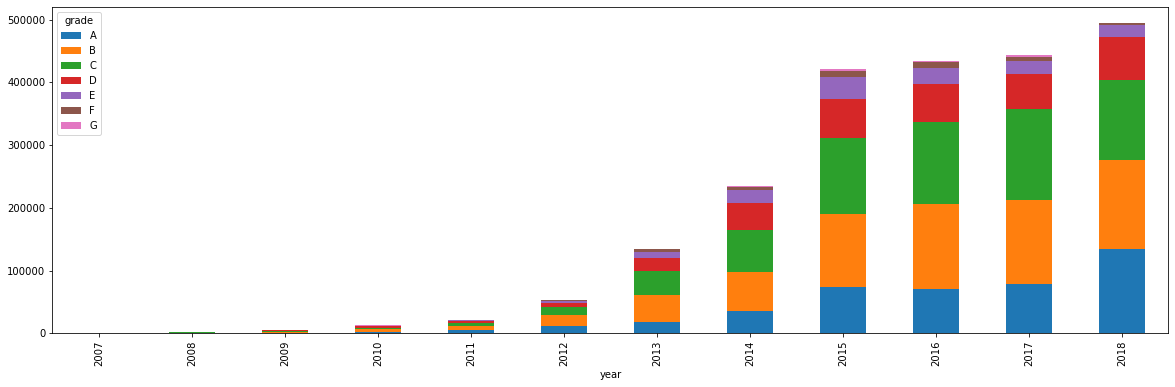

In [11]:
subset.groupby(['year','grade'])['year'].count().unstack('grade').fillna(0).\
plot(kind='bar', stacked=True, figsize=(20,6))

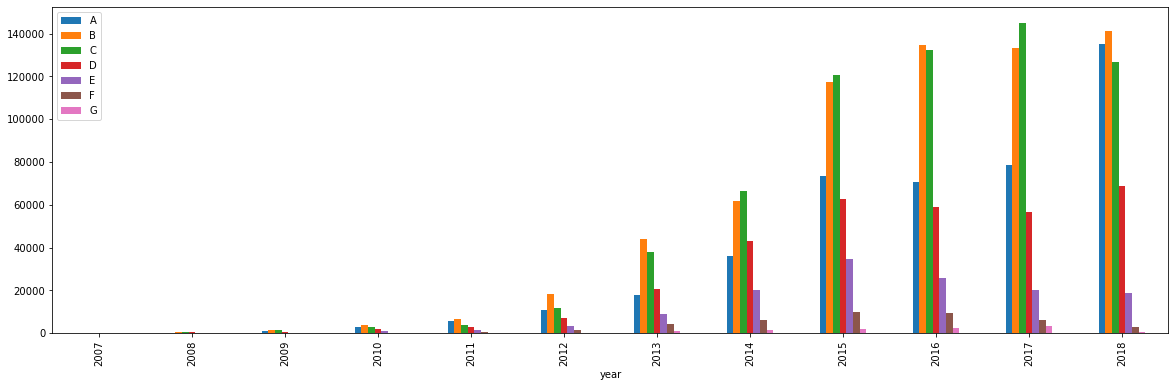

In [12]:
subset.groupby(['year','grade']).size().unstack('grade').plot(kind = 'bar', figsize = (20,6))
plt.legend(loc=2)

In [13]:
subset2 = pd.DataFrame(subset.groupby(['year','grade']).size()).reset_index()
subset2.columns = ['year','grade','count'] 
subset2['ratio'] = subset2['count'] / subset2.groupby('year')['count'].transform('sum')
subset2 = subset2.drop('count',1)
subset2

,year,grade,ratio
0,2007,A,0.129353
1,2007,B,0.162521
2,2007,C,0.233831
3,2007,D,0.164179
4,2007,E,0.165837
...,...,...,...
79,2018,C,0.256137
80,2018,D,0.139419
81,2018,E,0.038280
82,2018,F,0.006411


In [14]:
index = pd.MultiIndex.from_tuples(list(zip(subset2.year,subset2.grade)))
subset2 = subset2[['ratio']]
subset2.index = index
subset2

ratio
2007 A  0.129353
     B  0.162521
     C  0.233831
     D  0.164179
     E  0.165837
...          ...
2018 C  0.256137
     D  0.139419
     E  0.038280
     F  0.006411
     G  0.001355

[84 rows x 1 columns]

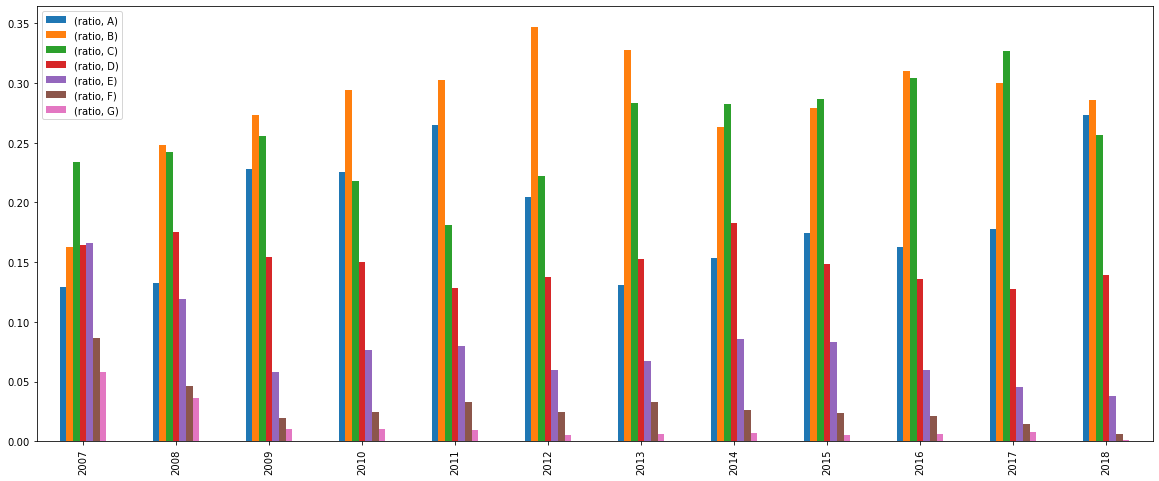

In [15]:
subset2.unstack(level = -1).plot(kind = 'bar', figsize = (20,8))
plt.legend(loc = 2)

**What are the purposes of applying Lending Club loans?**

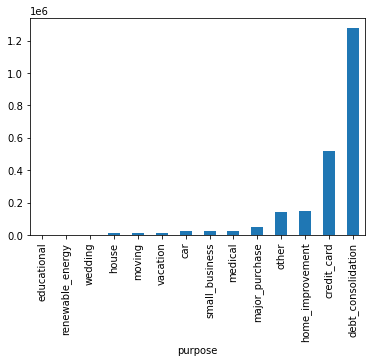

In [16]:
accepted.groupby('purpose').size().sort_values().plot(kind = 'bar')

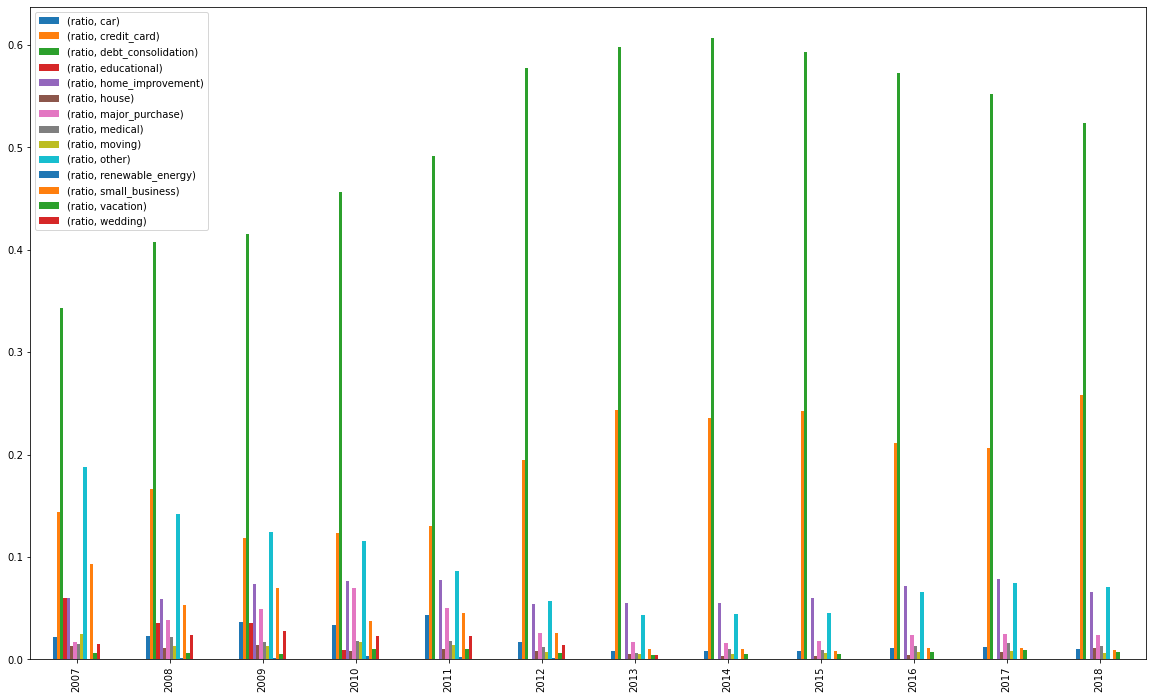

In [17]:
subset3 = pd.DataFrame(subset.groupby(['year','purpose']).size()).reset_index()
subset3.columns = ['year','purpose','count'] 
subset3['ratio'] = subset3['count'] / subset3.groupby('year')['count'].transform('sum')
subset3 = subset3.drop('count',1)
index2 = pd.MultiIndex.from_tuples(list(zip(subset3.year,subset3.purpose)))
subset3 = subset3[['ratio']]
subset3.index = index2
subset3.unstack(level = -1).plot(kind = 'bar', figsize = (20,12))
plt.legend(loc = 2)

**Do you observe different loan grade patterns for different loan purposes?**

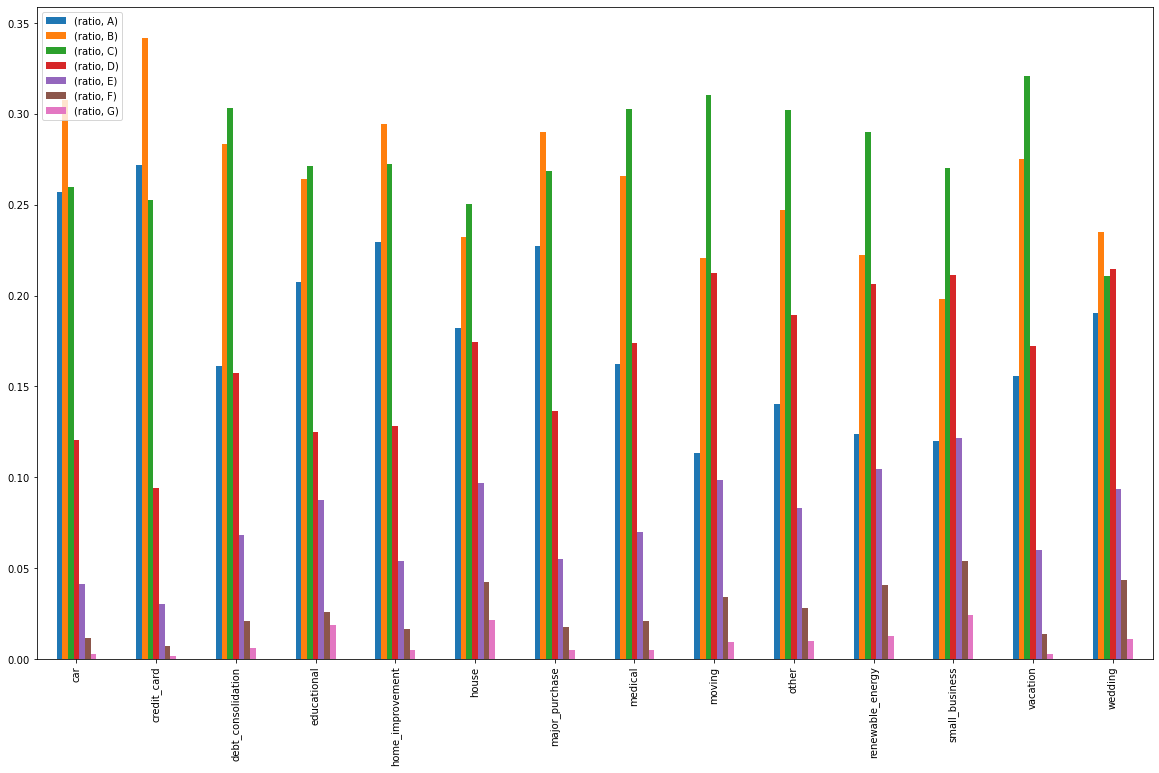

In [18]:
subset4 = pd.DataFrame(subset.groupby(['purpose','grade']).size()).reset_index()
subset4.columns = ['purpose','grade','count'] 
subset4['ratio'] = subset4['count'] / subset4.groupby('purpose')['count'].transform('sum')
subset4 = subset4.drop('count',1)
index3 = pd.MultiIndex.from_tuples(list(zip(subset4.purpose,subset4.grade)))
subset4 = subset4[['ratio']]
subset4.index = index3
subset4.unstack(level = -1).plot(kind = 'bar', figsize = (20,12))
plt.legend(loc = 2)

**Are loans with higher funded amounts harder to be paid-in-full?**

In [19]:
n = 11
bin_limit = np.linspace(0,40000,n)
ratio = (n-1)*[0]

for i in range(n-1):
    low = bin_limit[i]
    high = bin_limit[i+1]

    fully_paid = accepted.loc[accepted.loan_status =='Fully Paid',:].loc[accepted.loan_amnt > low,:]\
    .loc[accepted.loan_amnt < high,:].loan_status.count()

    total = accepted.loc[accepted.loan_amnt > low,:]\
    .loc[accepted.loan_amnt < high,:].loan_status.count()

    ratio[i] = fully_paid/total


dic = {'0-4K':ratio[0],'4K-8K':ratio[1],'8K-12K':ratio[2],'12K-16K':ratio[3],'16K-20K':ratio[4],\
      '20K-24K':ratio[5],'24K-28K':ratio[6],'28K-32K':ratio[7],'32K-36K':ratio[8],'36K-40K':ratio[9]}
ratio 

[0.5267069728812843,
 0.5340398587694605,
 0.49025546062426956,
 0.4794012648823007,
 0.489002442385624,
 0.47995007351463415,
 0.4261536632866717,
 0.3848921706516643,
 0.44401548156215964,
 0.17736556898707795]

Text(0.5, 1.0, 'Ratio of fully paid loans in each loan bracket')

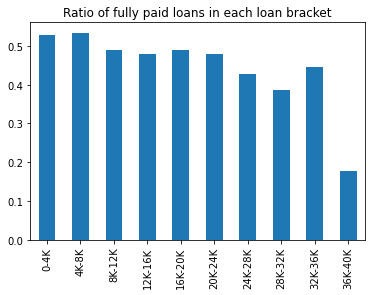

In [20]:
pd.Series(dic).plot(kind = 'bar')
plt.title('Ratio of fully paid loans in each loan bracket')

In [21]:
accepted['issue_d'].value_counts()

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Name: issue_d, Length: 139, dtype: int64

In [22]:
dt = accepted[['issue_d']] 
dt['date'] = pd.to_datetime(dt['issue_d'])
dt.head()

<ipython-input-22-dd6a88552f4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['date'] = pd.to_datetime(dt['issue_d'])


,issue_d,date
0,Dec-2015,2015-12-01
1,Dec-2015,2015-12-01
2,Dec-2015,2015-12-01
3,Dec-2015,2015-12-01
4,Dec-2015,2015-12-01


### Question 3:
- For borrowers, the most important factor is **interest rate** charged.
- Provide insights on the **interest rates** dependence on loan grade/subgrade and term (36 or 60 months).
- If the analysis is refined by separating loans with different start months 
(the year-month loan issuance date), report your finding.
- Any rational explanation on why the **interest rate** should be grade/sub-grade 
dependent?
- Any rational explanation on the time series variations of interest rates?
- Any rational explanation why the interest rate rise w.r.t. loan term?

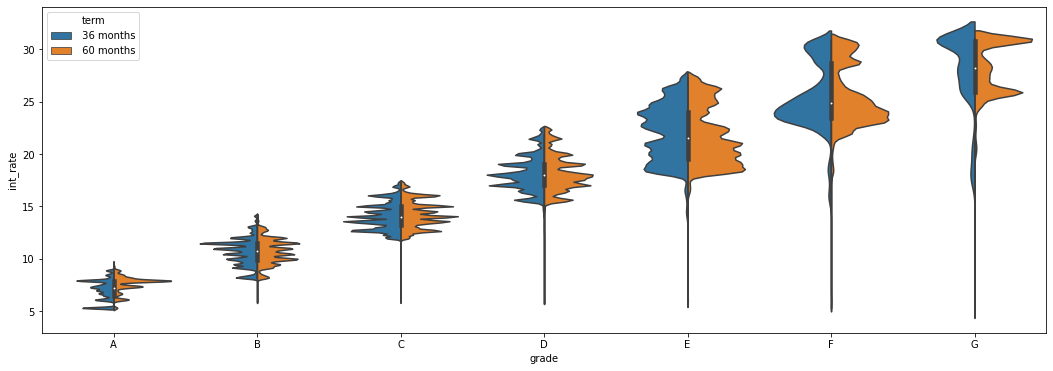

In [23]:
import seaborn as sns
subset5 = accepted[['grade','int_rate','term']].sort_values(by='grade')
plt.figure(figsize=(18,6))
sns.violinplot(x='grade', y='int_rate', hue='term', split=True, data=subset5)

In [24]:
subset6 = accepted[['issue_d','grade','int_rate','term']]
subset6['date'] = pd.to_datetime(subset6['issue_d'])
subset6.head()

<ipython-input-24-7746ae111f08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset6['date'] = pd.to_datetime(subset6['issue_d'])


,issue_d,grade,int_rate,term,date
0,Dec-2015,C,13.99,36 months,2015-12-01
1,Dec-2015,C,11.99,36 months,2015-12-01
2,Dec-2015,B,10.78,60 months,2015-12-01
3,Dec-2015,C,14.85,60 months,2015-12-01
4,Dec-2015,F,22.45,60 months,2015-12-01


In [25]:
subset6 = subset6.sort_values(by='date').set_index('date')
subset6.head()

,issue_d,grade,int_rate,term
date,,,,
2007-06-01,Jun-2007,A,8.38,36 months
2007-06-01,Jun-2007,C,10.59,36 months
2007-06-01,Jun-2007,B,9.64,36 months
2007-06-01,Jun-2007,B,9.01,36 months
2007-06-01,Jun-2007,C,11.22,36 months


In [26]:
subset7 = subset6.loc[subset6.term == ' 36 months']

Text(0.5, 1.0, '36 Months')

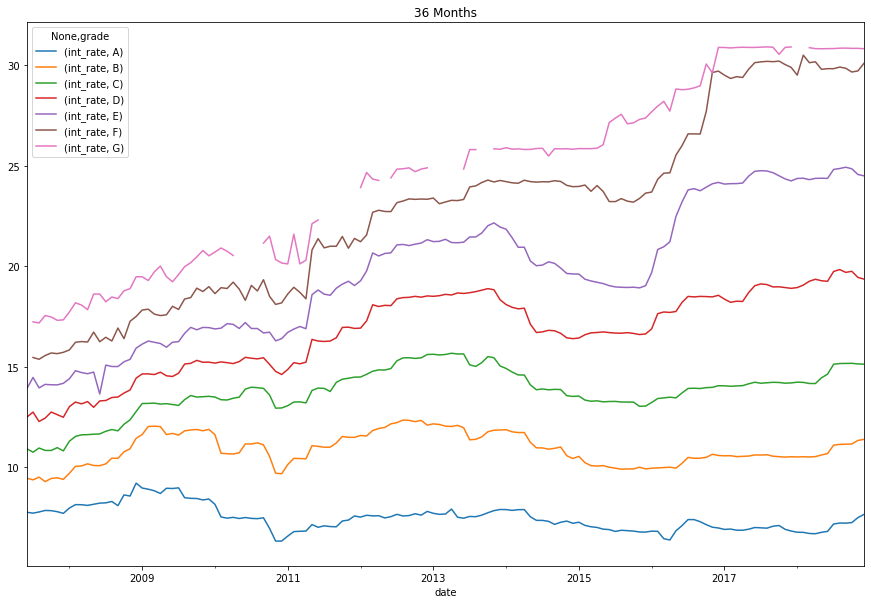

In [27]:
pd.DataFrame (subset7.groupby(['date','grade']).mean().unstack()).plot(figsize = (15,10))
plt.title('36 Months')

Text(0.5, 1.0, '60 Months')

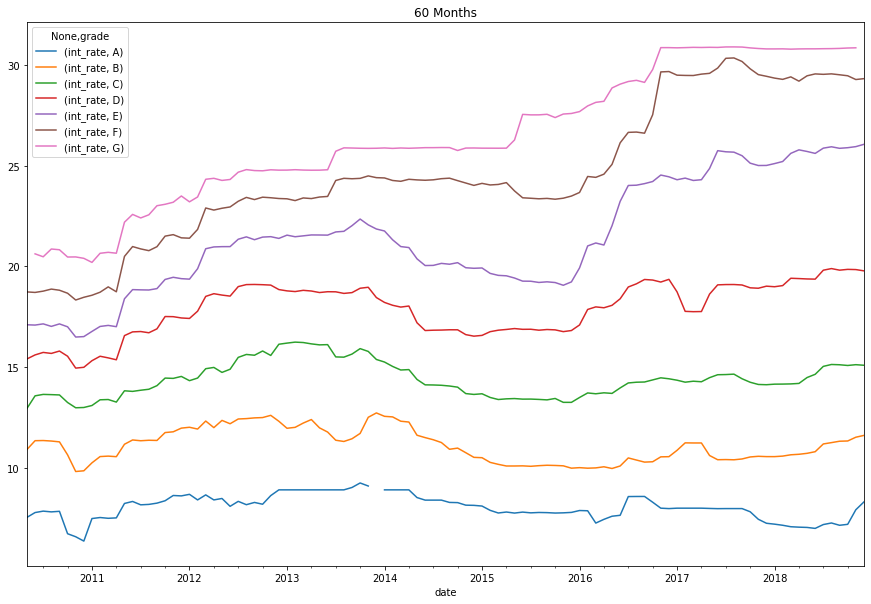

In [28]:
subset8 = subset6.loc[subset6.term == ' 60 months']
pd.DataFrame (subset8.groupby(['date','grade']).mean().unstack()).plot(figsize = (15,10))
plt.title('60 Months')

### Question 4:
- For investors, it is crucial to know whether a loan is served to completion (loan_status 'Fully Paid').
- Please analyze the percentages of non-completed loans in each loan grade/subgrade 
(i.e. default, charged off) which go beyond **delinquency**. 
- Provide justification the introduction of loan grade/subgrade.
- Provide justification on the rate hike on riskier loan grade/subgrade.
- What happens to percentage rates of loans involving settlement?
- Make sure that your analysis takes into account of **loan-term**.

In [29]:
subset9 = accepted[['grade','loan_status','debt_settlement_flag','int_rate','term']]
subset9.head()

,grade,loan_status,debt_settlement_flag,int_rate,term
0,C,Fully Paid,N,13.99,36 months
1,C,Fully Paid,N,11.99,36 months
2,B,Fully Paid,N,10.78,60 months
3,C,Current,N,14.85,60 months
4,F,Fully Paid,N,22.45,60 months


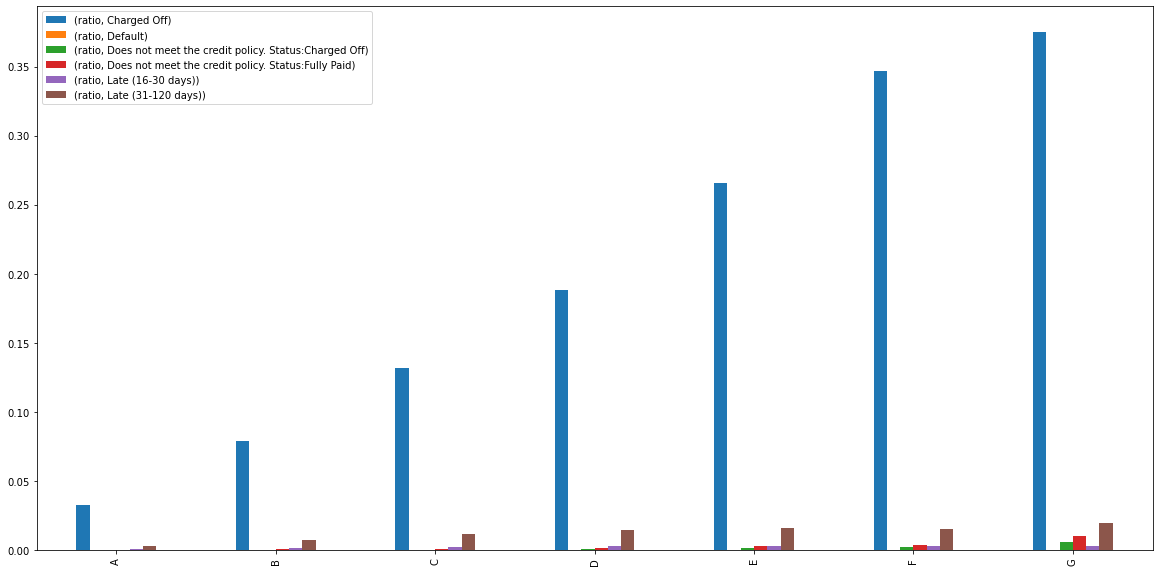

In [30]:
subset10 = pd.DataFrame(subset9.groupby(['grade','loan_status']).size().reset_index())
subset10.columns = ['grade','status','count']
subset10['ratio'] = subset10['count'] / subset10.groupby('grade')['count'].transform('sum')
mask = subset10.status.isin(['Current','Fully Paid', 'In Grace Period'])
subset10 = subset10.drop('count',1)
subset10 = subset10.loc[~mask,:]
index4 = pd.MultiIndex.from_tuples(list(zip(subset10.grade,subset10.status)))
subset10 = subset10[['ratio']]
subset10.index = index4

subset10.unstack(level = -1).plot(kind = 'bar', figsize = (20,10))
plt.legend(loc = 2)

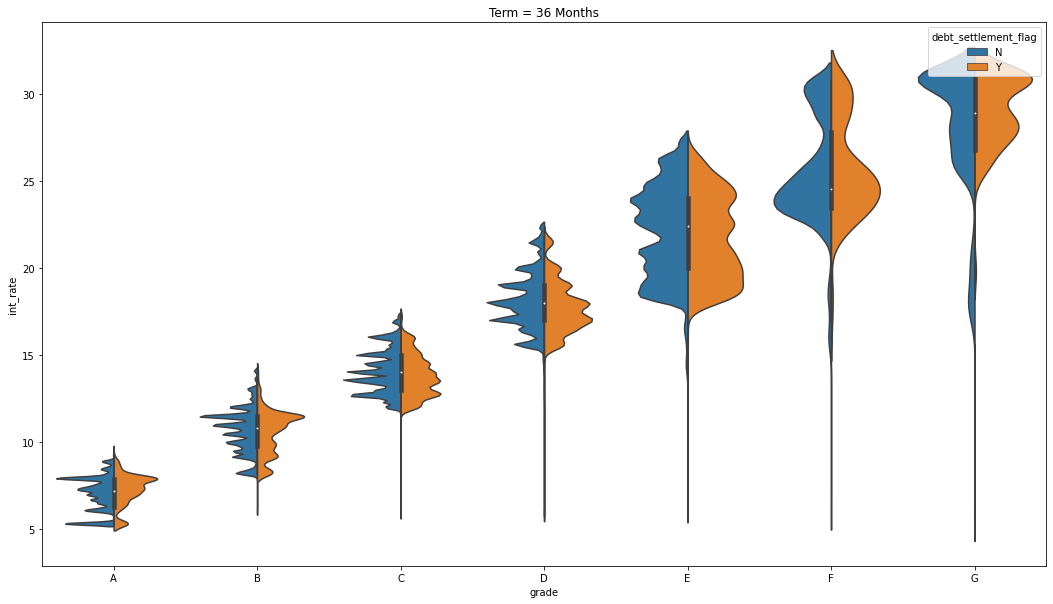

In [31]:
plt.figure(figsize = (18,10))
plt.title('Term = 36 Months')
sns.violinplot(x = 'grade',y = 'int_rate', hue = 'debt_settlement_flag', \
               split= True, data=subset9.sort_values(by = 'grade').loc[subset9.term == ' 36 months'])

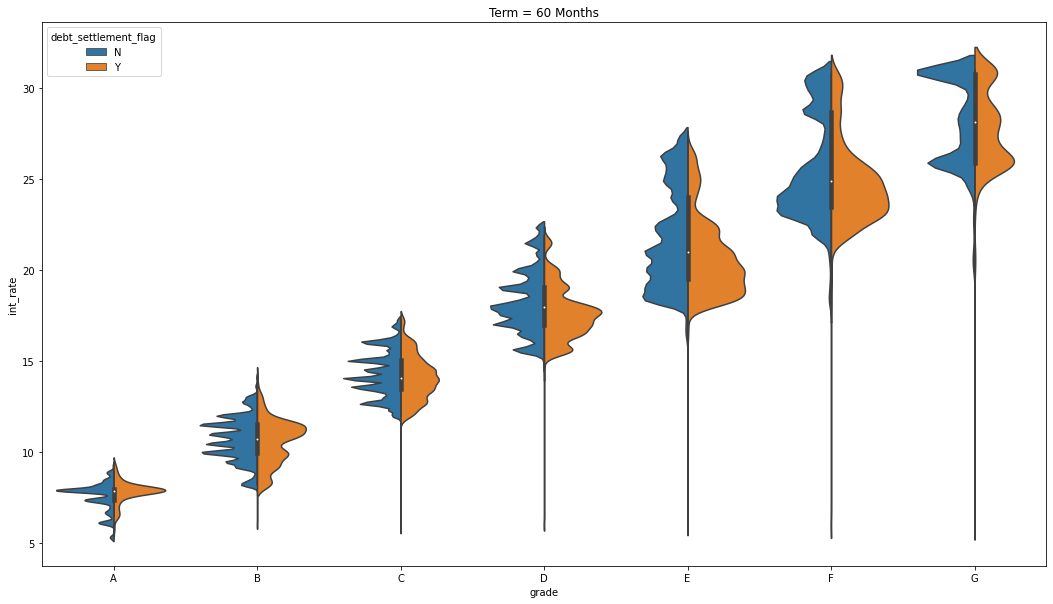

In [32]:
plt.figure(figsize = (18,10))
plt.title('Term = 60 Months')
sns.violinplot(x = 'grade',y = 'int_rate', hue = 'debt_settlement_flag', \
               split=True, data=subset9.sort_values(by = 'grade').loc[subset9.term == ' 60 months'])

### Question 5:
- For investors, the **amortization process** returns the partial principal and 
monthly interest in a single montly installment payment.
- Because the borrower can pre-pay the principal at-will or go belly-up (delinquent or default) at any
moment within the loan term, it may shorten the loan duration un-expectedly or
cause losses to the investors.
- Thus it is vital for the investors to know the general pattern of loan-prepayment
or delinquency (early stage leading to default or eventual charged off).
- Please compute the actual durations of loans (last_payment_date - issuance_date)
and 
    - analyze the pattern debtors terminate the loans before loan maturity 
    (either 'fully paid', or stop paying henceforth).
    - Please include 'term', 'loan-grade/sub-grade' in your analysis.
- Do you see major differences on the patterns with different loan-terms? 
What is the rational explanation for this difference?

- Report the major characteristics of the patterns. 
- Do '60 months' (5 years) loans often get terminated at the end of the 5 years
loan term? Why not?
    
    

In [33]:
# We select the portion of data that we want to use

subset11 = accepted[['issue_d','last_pymnt_d','term','loan_status','grade']].dropna(axis=0)
subset11.head()

,issue_d,last_pymnt_d,term,loan_status,grade
0,Dec-2015,Jan-2019,36 months,Fully Paid,C
1,Dec-2015,Jun-2016,36 months,Fully Paid,C
2,Dec-2015,Jun-2017,60 months,Fully Paid,B
3,Dec-2015,Feb-2019,60 months,Current,C
4,Dec-2015,Jul-2016,60 months,Fully Paid,F


In [34]:
# We define the duration of payments in months

subset11.issue_d = pd.to_datetime(subset11.issue_d)
subset11.last_pymnt_d = pd.to_datetime(subset11.last_pymnt_d)
subset11['duration'] = (subset11.last_pymnt_d - subset11.issue_d)/np.timedelta64(1, 'M')
subset11['duration'] = subset11['duration'].astype(int)
subset11['term_m'] = list(map(lambda x: int(x.split(' ')[1]),subset11.term))

In [35]:
# We define the maturity and payment status of the loan

subset11['maturity'] = subset11.duration < subset11.term_m
subset11['pay_status'] = subset11.loan_status == 'Fully Paid'
subset11.loc[subset11.maturity == True,'maturity'] = 'premature'
subset11.loc[subset11.maturity == False,'maturity'] = 'mature'
subset11.loc[subset11.pay_status == True,'pay_status'] = 'fully_paid'
subset11.loc[subset11.pay_status == False,'pay_status'] = 'partially_paid'

# we exclude the premature but 'Current' loans and the mature loans which are'In Grace Period'

subset11 = subset11.loc[subset11.loan_status != 'Current']
subset11 = subset11.loc[subset11.loan_status != 'In Grace Period']

In [36]:
subset11.head()

,issue_d,last_pymnt_d,term,loan_status,grade,duration,term_m,maturity,pay_status
0,2015-12-01,2019-01-01,36 months,Fully Paid,C,37,36,mature,fully_paid
1,2015-12-01,2016-06-01,36 months,Fully Paid,C,6,36,premature,fully_paid
2,2015-12-01,2017-06-01,60 months,Fully Paid,B,18,60,premature,fully_paid
4,2015-12-01,2016-07-01,60 months,Fully Paid,F,6,60,premature,fully_paid
5,2015-12-01,2017-05-01,36 months,Fully Paid,C,16,36,premature,fully_paid


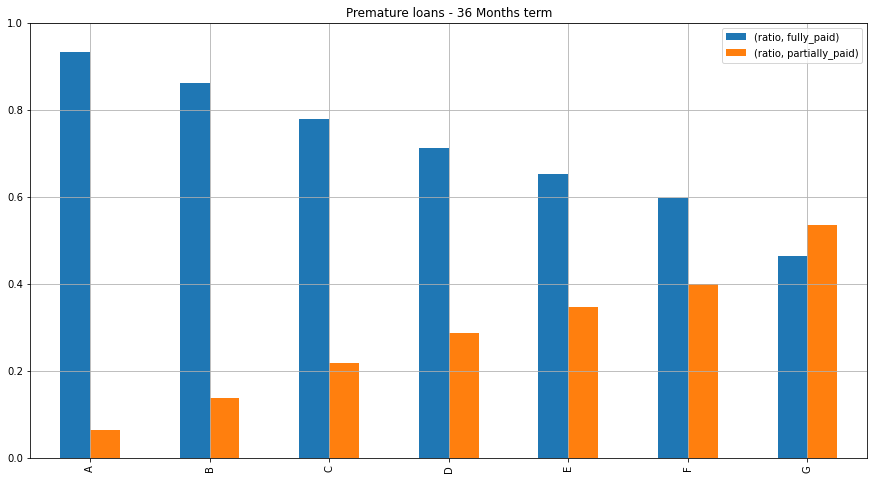

In [37]:
# We define the ratio of fully paid and partially paid premature loans for loans with 36 months term

subset12 = pd.DataFrame(subset11.loc[subset11.term == ' 36 months'].groupby(['grade','pay_status']).size().reset_index())
subset12.columns = ['grade','pay_status','count']
subset12['ratio'] = subset12['count'] / subset12.groupby('grade')['count'].transform('sum')
subset12 = subset12.drop('count',1)
index5 = pd.MultiIndex.from_tuples(list(zip(subset12.grade,subset12.pay_status)))
subset12 = subset12[['ratio']]
subset12.index = index5
subset12.unstack(level = -1).plot(kind = 'bar', figsize = (15,8))
plt.legend(loc = 1)
plt.ylim(0.0, 1)
plt.title('Premature loans - 36 Months term')
plt.grid()

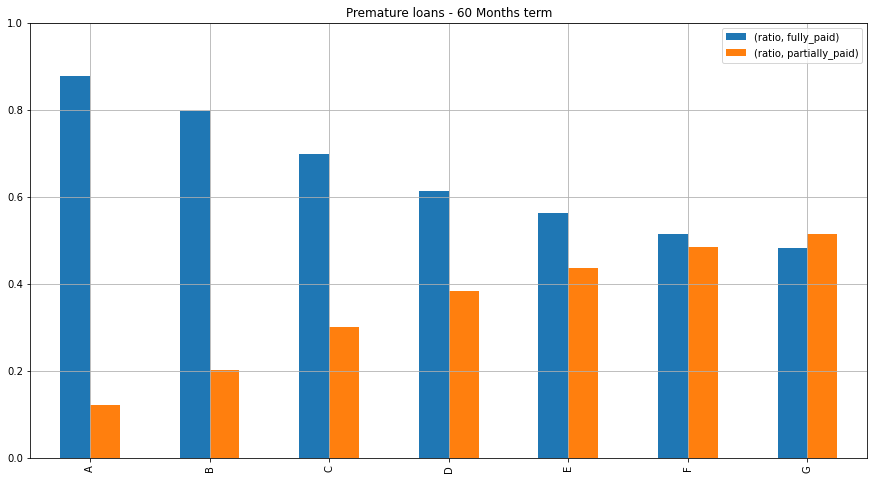

In [38]:
# We define the ratio of fully paid and partially paid premature loans for loans with 60 months term
subset13 = pd.DataFrame(subset11.loc[subset11.term ==' 60 months'].groupby(['grade','pay_status']).size().reset_index())
subset13.columns = ['grade','pay_status','count']
subset13['ratio'] = subset13['count'] / subset13.groupby('grade')['count'].transform('sum')
subset13 = subset13.drop('count',1)
index6 = pd.MultiIndex.from_tuples(list(zip(subset13.grade,subset13.pay_status)))
subset13 = subset13[['ratio']]
subset13.index = index6

subset13.unstack(level = -1).plot(kind = 'bar', figsize = (15,8))
plt.legend(loc = 1)
plt.ylim(0.0, 1)
plt.title('Premature loans - 60 Months term')
plt.grid()

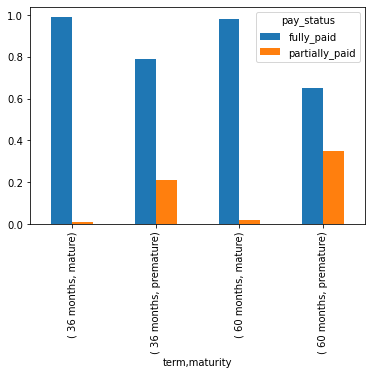

In [39]:
subset11.groupby(['term','maturity']).pay_status.value_counts(normalize = True).unstack(level = -1).plot(kind = 'bar')

In [40]:
# there are some loans that although they have made 36 or 60 payments or more but it's still isn't fully paid!!!

subset11.loc[subset11.maturity == 'mature'].loc[subset11.pay_status == 'partially_paid']

,issue_d,last_pymnt_d,term,loan_status,grade,duration,term_m,maturity,pay_status
457,2015-12-01,2018-12-01,36 months,Late (31-120 days),C,36,36,mature,partially_paid
580,2015-12-01,2019-02-01,36 months,Charged Off,B,38,36,mature,partially_paid
795,2015-12-01,2019-02-01,36 months,Charged Off,B,38,36,mature,partially_paid
1488,2015-12-01,2019-02-01,36 months,Charged Off,C,38,36,mature,partially_paid
1702,2015-12-01,2019-01-01,36 months,Late (31-120 days),F,37,36,mature,partially_paid
...,...,...,...,...,...,...,...,...,...
1933490,2012-03-01,2015-04-01,36 months,Charged Off,C,36,36,mature,partially_paid
1934800,2012-02-01,2015-03-01,36 months,Charged Off,A,36,36,mature,partially_paid
1935952,2012-02-01,2017-05-01,60 months,Charged Off,E,62,60,mature,partially_paid
1936601,2012-02-01,2015-04-01,36 months,Charged Off,C,37,36,mature,partially_paid


### Question 6:
- For investors, the profitability of the loans is of their central 
concern.
- For a given loan, the profit-and-loss (in percentages) can be computed as
the (total_payment - principal)/principal.
- For those loans which are eventually 'Fully Paid', what are the average
returns (or the distributions of returns) of different loan grades/terms?
- For those loans wich are default or beyond, what are the average returns or return distributions?
- What about all the loans which have been 
terminated ('fully paid', 'default', 'charged off')?
- What about the loans which end up in **loan settlement negotiations**?
- Any variation of patterns for different loan purposes?
- What happens if the issuance years are included in your analysis?
- Is there any pattern between loan duration vs return rate?

In [41]:
subset14 = accepted[['issue_d','term','grade','purpose','total_pymnt','total_pymnt_inv','loan_status','funded_amnt',\
                     'funded_amnt_inv','debt_settlement_flag']].dropna(how='any' , axis = 0 )

subset14.loc[subset14.funded_amnt != subset14.funded_amnt_inv]

,issue_d,term,grade,purpose,total_pymnt,total_pymnt_inv,loan_status,funded_amnt,funded_amnt_inv,debt_settlement_flag
1486,Dec-2015,60 months,F,debt_consolidation,40462.341533,40394.90,Fully Paid,30000.0,29950.0,N
1800,Dec-2015,36 months,C,debt_consolidation,17833.507947,17744.34,Fully Paid,15000.0,14925.0,N
1827,Dec-2015,36 months,C,other,10035.255898,10005.39,Fully Paid,8400.0,8375.0,N
1946,Dec-2015,36 months,D,debt_consolidation,19404.916226,19340.23,Fully Paid,15000.0,14950.0,N
2582,Dec-2015,36 months,E,debt_consolidation,27710.920000,27685.26,Charged Off,27000.0,26975.0,N
...,...,...,...,...,...,...,...,...,...,...
2260535,Oct-2016,36 months,C,debt_consolidation,24473.930000,24218.99,Current,24000.0,23750.0,N
2260623,Oct-2016,60 months,C,debt_consolidation,33933.710078,33903.36,Fully Paid,27950.0,27925.0,N
2260665,Oct-2016,60 months,C,debt_consolidation,26610.570000,26560.68,Current,40000.0,39925.0,N
2260676,Oct-2016,60 months,C,debt_consolidation,21765.060000,21731.05,Current,32000.0,31950.0,N


In [42]:
subset14['profit_p'] = \
(np.array(subset14.total_pymnt_inv)-np.array(subset14.funded_amnt_inv))/np.array(subset14.funded_amnt_inv)*100
subset14.head()

<ipython-input-42-64771688ef4f>:2: RuntimeWarning: invalid value encountered in true_divide
  (np.array(subset14.total_pymnt_inv)-np.array(subset14.funded_amnt_inv))/np.array(subset14.funded_amnt_inv)*100


,issue_d,term,grade,purpose,total_pymnt,total_pymnt_inv,loan_status,funded_amnt,funded_amnt_inv,debt_settlement_flag,profit_p
0,Dec-2015,36 months,C,debt_consolidation,4421.723917,4421.72,Fully Paid,3600.0,3600.0,N,22.825556
1,Dec-2015,36 months,C,small_business,25679.660000,25679.66,Fully Paid,24700.0,24700.0,N,3.966235
2,Dec-2015,60 months,B,home_improvement,22705.924294,22705.92,Fully Paid,20000.0,20000.0,N,13.529600
3,Dec-2015,60 months,C,debt_consolidation,31464.010000,31464.01,Current,35000.0,35000.0,N,-10.102829
4,Dec-2015,60 months,F,major_purchase,11740.500000,11740.50,Fully Paid,10400.0,10400.0,N,12.889423


Text(0.5, 1.0, 'Profit percentage distribution for fully paid loans')

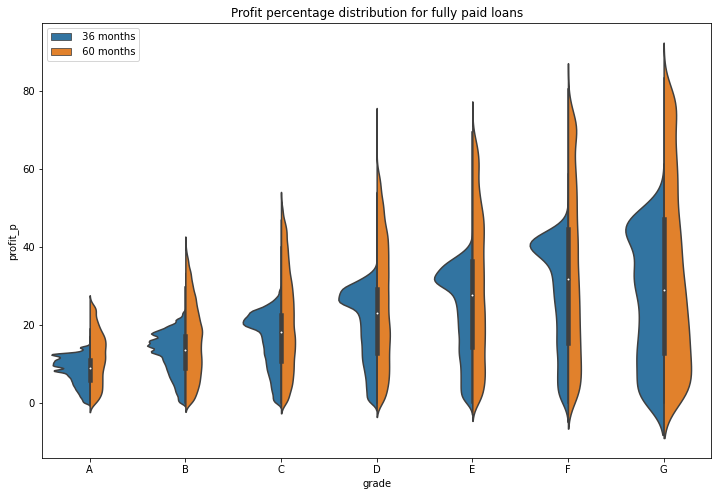

In [43]:
# finding the profit distribution of fully paid loans for different grades and terms

plt.figure (figsize = (12,8))
sns.violinplot(x = 'grade',y = 'profit_p', hue = 'term', \
               split=True, data=subset14.loc[subset14.loan_status == 'Fully Paid'].sort_values(by = 'grade'))
plt.legend (loc =2)
plt.title('Profit percentage distribution for fully paid loans')

Text(0.5, 1.0, 'Profit percentage distribution for default and beyond loans')

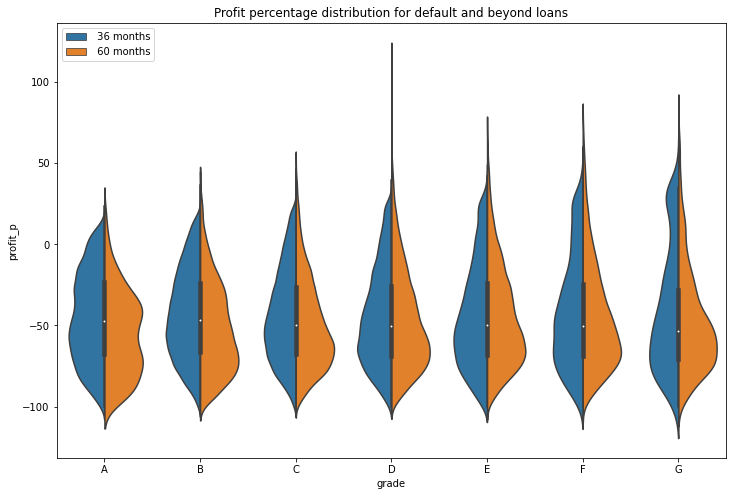

In [44]:
# finding the profit distribution of partially paid (excluding "Current") loans for different grades and terms
plt.figure (figsize = (12,8))
sns.violinplot(x = 'grade',y = 'profit_p', hue = 'term', \
               split=True, data=subset14.loc[subset14.loan_status != 'Fully Paid'].\
               loc[subset14.loan_status != 'Current'].sort_values(by = 'grade'))
plt.legend (loc =2)
plt.title('Profit percentage distribution for default and beyond loans')

Text(0.5, 1.0, 'Profit percentage distribution for terminated loans')

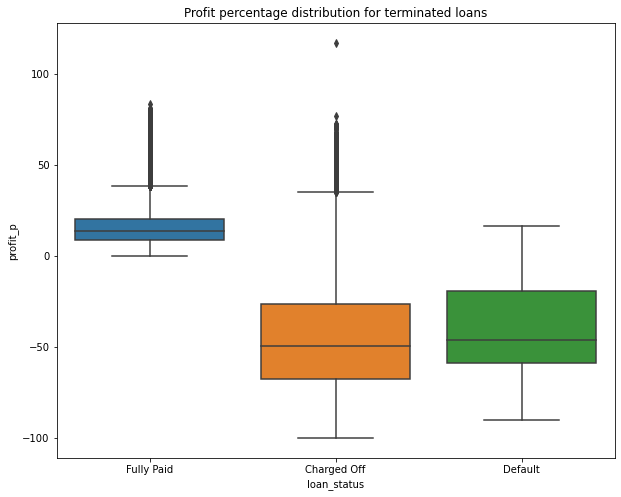

In [45]:
plt.figure(figsize = (10,8))
mask = subset14.loan_status.isin(['Fully Paid', 'Charged Off', 'Default'])
sns.boxplot(x = 'loan_status', y = 'profit_p', data = subset14.loc[mask,:])
plt.title('Profit percentage distribution for terminated loans')

In [46]:
subset14.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Profit percentage distribution of terminated loans based on settlement flag')

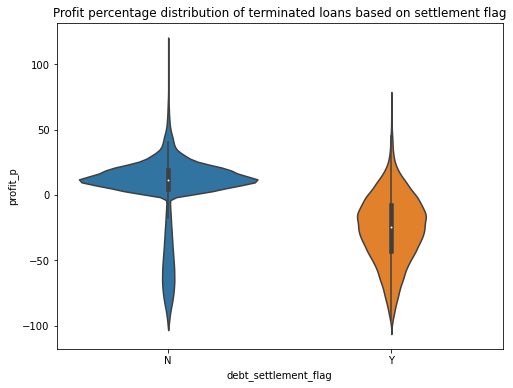

In [47]:
# we use mask to only consider terminated loans
plt.figure(figsize = (8,6))
mask = subset14.loan_status.isin(['Fully Paid', 'Charged Off', 'Default'])
sns.violinplot(x = 'debt_settlement_flag', y = 'profit_p', data = subset14.loc[mask,:])
plt.title('Profit percentage distribution of terminated loans based on settlement flag')

Text(0.5, 1.0, 'Profit percentage distribution of terminated loans based on settlement flag')

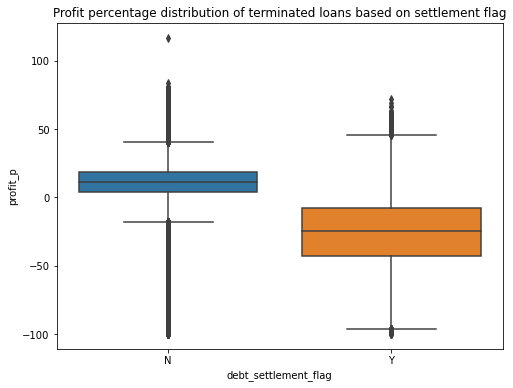

In [48]:
# we use mask to only consider terminated loans

plt.figure(figsize = (8,6))
sns.boxplot(x = 'debt_settlement_flag', y = 'profit_p', data = subset14.loc[mask,:])
plt.title('Profit percentage distribution of terminated loans based on settlement flag')

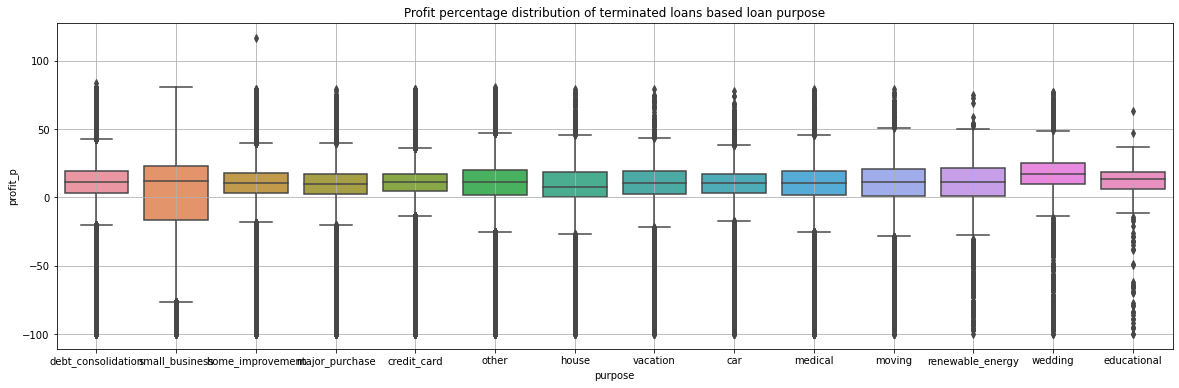

In [49]:
# we use mask to only consider terminated loans
plt.figure(figsize= (20,6))
sns.boxplot(x = 'purpose', y = 'profit_p', data = subset14.loc[mask,:])
plt.title('Profit percentage distribution of terminated loans based loan purpose')
plt.grid()

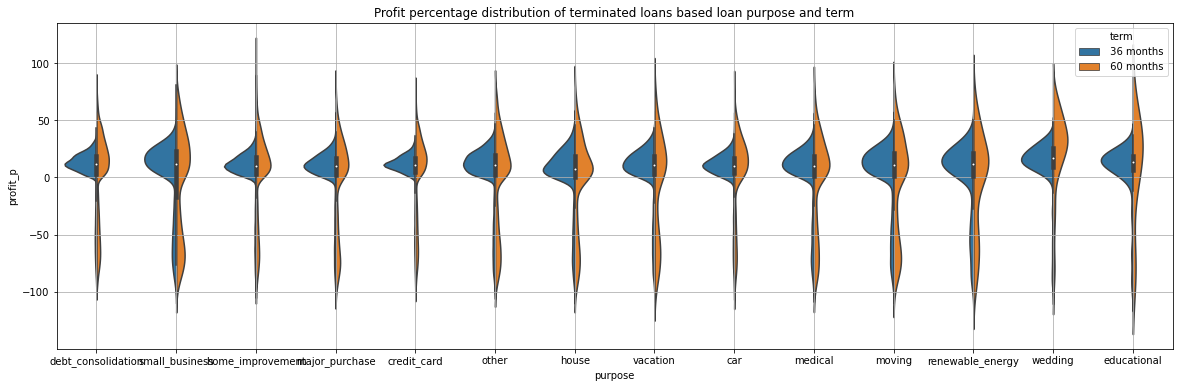

In [50]:
# we use mask to only consider terminated loans
plt.figure(figsize= (20,6))
sns.violinplot(x = 'purpose', y = 'profit_p', hue = 'term',split = True, data = subset14.loc[mask,:])
plt.title('Profit percentage distribution of terminated loans based loan purpose and term')
plt.grid()

In [51]:
subset14.head()

,issue_d,term,grade,purpose,total_pymnt,total_pymnt_inv,loan_status,funded_amnt,funded_amnt_inv,debt_settlement_flag,profit_p
0,Dec-2015,36 months,C,debt_consolidation,4421.723917,4421.72,Fully Paid,3600.0,3600.0,N,22.825556
1,Dec-2015,36 months,C,small_business,25679.660000,25679.66,Fully Paid,24700.0,24700.0,N,3.966235
2,Dec-2015,60 months,B,home_improvement,22705.924294,22705.92,Fully Paid,20000.0,20000.0,N,13.529600
3,Dec-2015,60 months,C,debt_consolidation,31464.010000,31464.01,Current,35000.0,35000.0,N,-10.102829
4,Dec-2015,60 months,F,major_purchase,11740.500000,11740.50,Fully Paid,10400.0,10400.0,N,12.889423


In [52]:
# We implement the mask so the subset15 only includes terminated loans

subset15 = subset14.copy()
subset15 = subset15.loc[mask,:]
subset15['date'] = pd.to_datetime(subset15.issue_d)
subset15.head()

,issue_d,term,grade,purpose,total_pymnt,total_pymnt_inv,loan_status,funded_amnt,funded_amnt_inv,debt_settlement_flag,profit_p,date
0,Dec-2015,36 months,C,debt_consolidation,4421.723917,4421.72,Fully Paid,3600.0,3600.0,N,22.825556,2015-12-01
1,Dec-2015,36 months,C,small_business,25679.660000,25679.66,Fully Paid,24700.0,24700.0,N,3.966235,2015-12-01
2,Dec-2015,60 months,B,home_improvement,22705.924294,22705.92,Fully Paid,20000.0,20000.0,N,13.529600,2015-12-01
4,Dec-2015,60 months,F,major_purchase,11740.500000,11740.50,Fully Paid,10400.0,10400.0,N,12.889423,2015-12-01
5,Dec-2015,36 months,C,debt_consolidation,13708.948530,13708.95,Fully Paid,11950.0,11950.0,N,14.719247,2015-12-01


In [53]:
subset15 = subset15.drop('issue_d',1).sort_values(by = 'date')

In [54]:
subset15 = subset15.set_index('date')

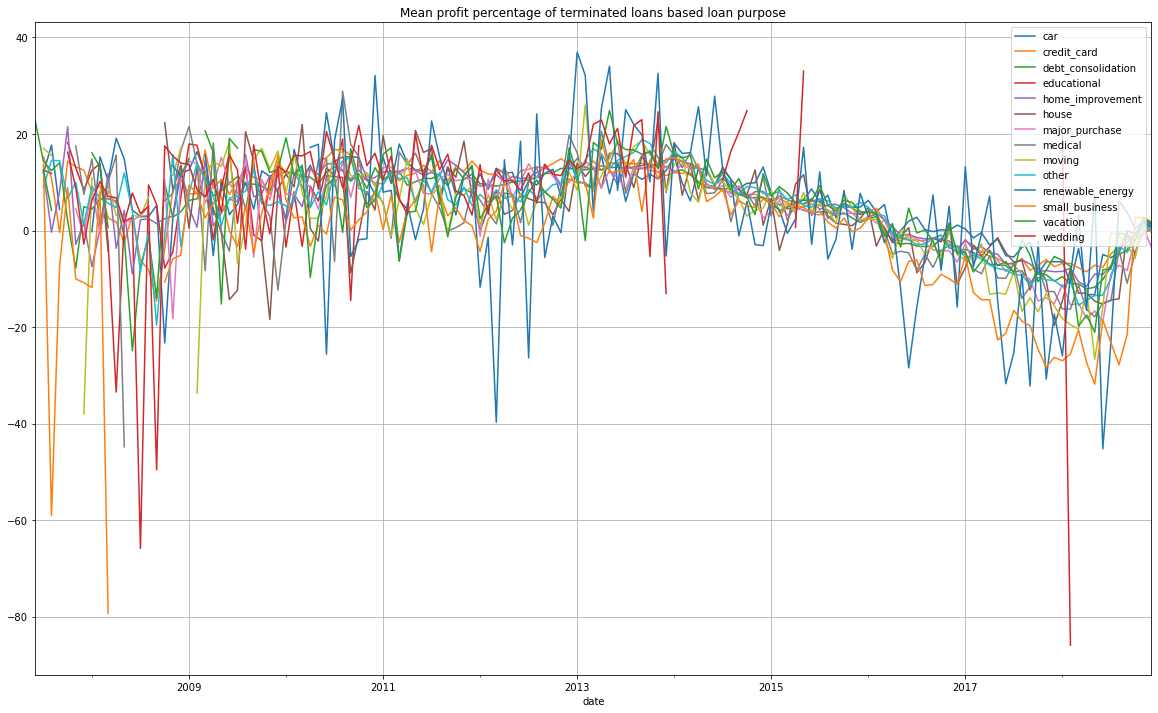

In [55]:
subset15.dropna(how='any', axis=0).groupby(['date','purpose']).profit_p.mean().unstack().plot(figsize= (20,12))
plt.title('Mean profit percentage of terminated loans based loan purpose')
plt.grid()
plt.legend(loc = 1)

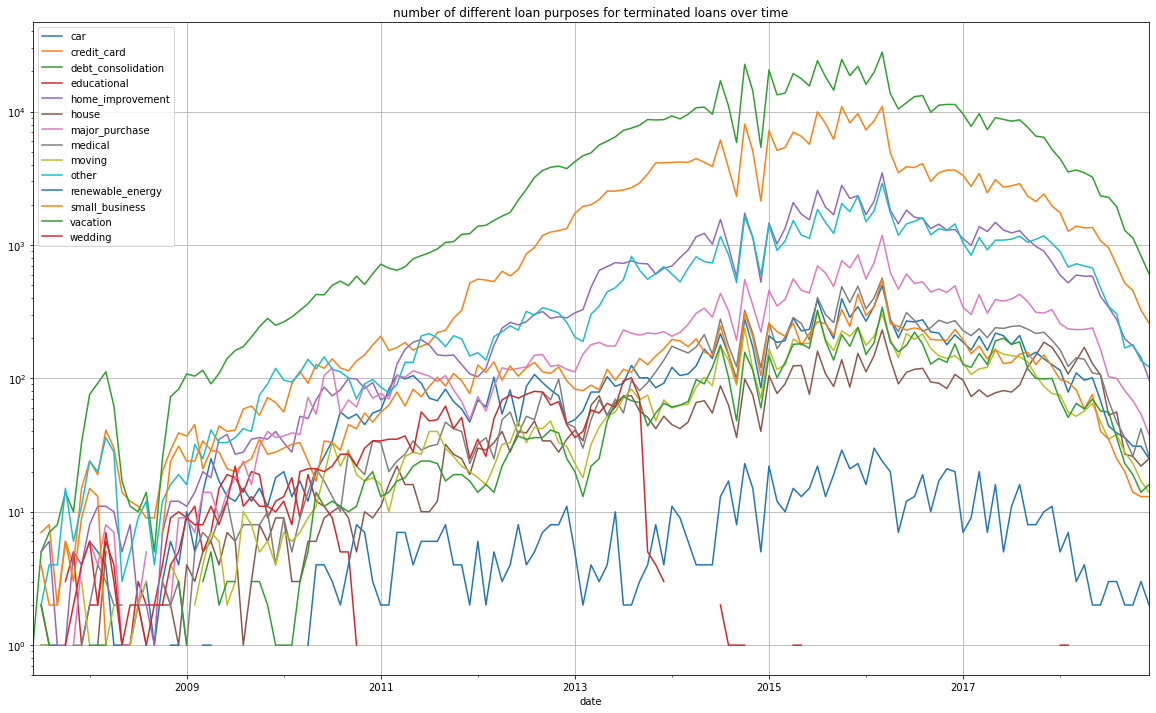

In [56]:
subset15.dropna(how='any', axis=0).groupby(['date']).purpose.value_counts().unstack().plot(figsize= (20,12))
plt.title('number of different loan purposes for terminated loans over time')
plt.grid()
plt.legend(loc = 2)
plt.yscale('log')

In [92]:
accepted.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64